In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os


In [12]:
#os.listdir('data')
#os.listdir('data/davinci_003/Baseline Questions')
os.listdir('data/gpt_3.5_turbo/Baseline Questions/')

['Test_chat_6_23_23.csv', 'Test_chat3_6_23_23.csv', 'Test_chat2_6_23_23.csv']

## Do analysis on Baseline model data collected 

### load data

In [5]:
df1 = pd.read_json('data/autocast_questions.json')

In [13]:
df_davinci_1 = pd.read_csv('data/davinci_003/Baseline Questions/Test_2_6_22_23.csv')
print(df_davinci_1.shape)

(3000, 7)


In [18]:
df_davinci_1.head()

,Unnamed: 0,ID,LLM,Leakage Status Open,Leakage Status Close,Answer,Base Answer
0,0,M7946,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,False,NaN,unknown.
1,1,M6046,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,False,NaN,it is impossible to accurately predict when 1 ...
2,2,M4571,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,0.15192857142857102,max
3,3,G2180,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,False,False,NaN,more than 5.0%
4,4,M4027,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,0.2,min


In [27]:
df_davinci_1['Base Answer']= df_davinci_1['Base Answer'].str.strip()

In [28]:
df_davinci_1['acc'] = df_davinci_1['Answer']==df_davinci_1['Base Answer']

In [32]:
df_davinci_1.head(10)

,Unnamed: 0,ID,LLM,Leakage Status Open,Leakage Status Close,Answer,Base Answer,acc
0,0,M7946,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,False,NaN,unknown.,False
1,1,M6046,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,False,NaN,it is impossible to accurately predict when 1 ...,False
2,2,M4571,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,0.15192857142857102,max,False
3,3,G2180,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,False,False,NaN,more than 5.0%,False
4,4,M4027,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,0.2,min,False
5,5,G1758,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,The Republican Party candidate,someone else,False
6,6,M4035,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,no,no,True
7,7,M900,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,no,no,True
8,8,M3028,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,0.49,max,False
9,9,G2248,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,False,False,NaN,no,False


In [43]:
plt.bar(x = df_davinci_1['acc'].value_counts())

TypeError: bar() missing 1 required positional argument: 'height'

<Axes: >

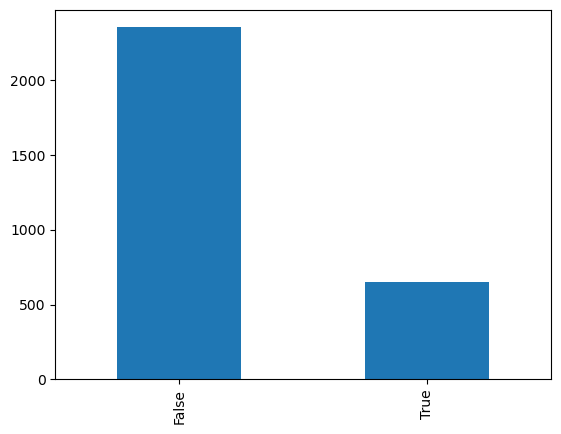

In [45]:
df_davinci_1['acc'].value_counts().plot(kind = 'bar')

In [17]:
df_gpt_35_1 = pd.read_csv('data/gpt_3.5_turbo/Baseline Questions/Test_chat3_6_23_23.csv')
print(df_gpt_35_1.shape)

(500, 7)


In [29]:
df_gpt_35_1.head()

,Unnamed: 0,ID,LLM,Leakage Status Open,Leakage Status Close,Answer,Base Answer
0,0,M5990,verbose=False callbacks=None callback_manager=...,True,True,0.537899999999999,"i'm sorry, but as an ai language model, i cann..."
1,1,M5904,verbose=False callbacks=None callback_manager=...,True,True,0.494224422442244,"i'm sorry, but i cannot answer that question w..."
2,2,G1822,verbose=False callbacks=None callback_manager=...,True,False,no,no.
3,3,G391,verbose=False callbacks=None callback_manager=...,True,True,yes,yes.
4,4,M3106,verbose=False callbacks=None callback_manager=...,True,False,NaN,"as an ai language model, i cannot predict the ..."


In [49]:
df_gpt_35_1['Base Answer']= df_gpt_35_1['Base Answer'].str.strip('.')

In [50]:
df_gpt_35_1['acc'] = df_gpt_35_1['Answer']==df_gpt_35_1['Base Answer']

<Axes: >

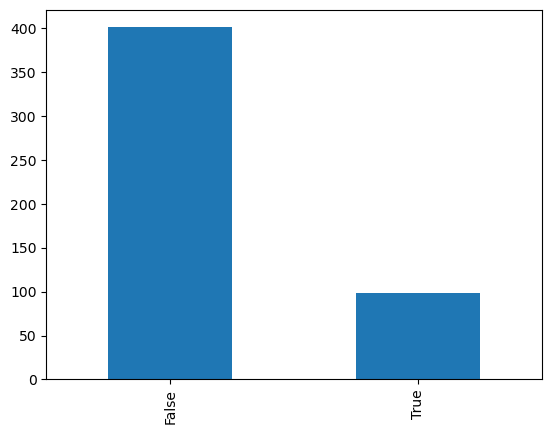

In [51]:
df_gpt_35_1['acc'].value_counts().plot(kind = 'bar')

In [66]:
df_davinci_1.rename({'ID':'id'}, axis = 'columns', inplace = True)
df_gpt_35_1.rename({'ID':'id'}, axis = 'columns', inplace = True)

In [ ]:
## Merge DataFrames

In [80]:
df_gpt_35 = df_gpt_35_1.merge(df1, on = 'id')

In [82]:
df_davinci = df_davinci_1.merge(df1, on = 'id')

In [78]:
print(df_gpt_35_1['id'].dtype, df1['id'].dtype, df_davinci_1['id'].dtype)

object object object


In [81]:
df_gpt_35.head(10)

,Unnamed: 0,id,LLM,Leakage Status Open,Leakage Status Close,Answer,Base Answer,acc,question,background,...,close_time,tags,source_links,prediction_count,forecaster_count,answer,choices,status,qtype,crowd
0,0,M5990,verbose=False callbacks=None callback_manager=...,True,True,0.537899999999999,"i'm sorry, but as an ai language model, i cann...",False,"For the month of February 2021, what will the ...",Context Nonfarm payroll employment is a compil...,...,2021-02-21 20:39:00+00:00,[Economy – US – Economic Indicators],[https://en.wikipedia.org/wiki/Nonfarm_payroll...,120.0,37,0.5379,"{'max': 5, 'min': -5, 'deriv_ratio': 1}",Resolved,num,[{'timestamp': '2020-12-20 10:28:26.920220+00:...
1,1,M5904,verbose=False callbacks=None callback_manager=...,True,True,0.494224422442244,"i'm sorry, but i cannot answer that question w...",False,What will the value of the herein defined Imag...,This question is part of the Maximum Likelihoo...,...,2021-02-13 23:00:00+00:00,"[Computing – Artificial Intelligence, Maximum ...",[https://www.metaculus.com/ai-progress-tournam...,227.0,60,0.494224,"{'max': 127, 'min': 114.88, 'deriv_ratio': 1}",Resolved,num,[{'timestamp': '2020-12-15 03:30:01.074507+00:...
2,2,G1822,verbose=False callbacks=None callback_manager=...,True,False,no,no,True,"Before 1 January 2022, will Amazon announce th...",As Amazon has grown it has received increased ...,...,2022-01-01 08:01:59+00:00,"[Business, Technology, US Politics]",[https://www.barrons.com/articles/amazon-is-a-...,1651.0,982,no,"[yes, no]",Resolved,t/f,"[{'timestamp': '2020-10-30 00:00:00+00:00', 'f..."
3,3,G391,verbose=False callbacks=None callback_manager=...,True,True,yes,yes,True,Will Angela Merkel be elected as chancellor of...,"Angela Merkel, the current chancellor and lead...",...,2018-03-14 17:00:36+00:00,"[Elections and Referenda, Non-US Politics]",[https://www.nytimes.com/2017/03/19/world/euro...,2783.0,766,yes,"[yes, no]",Resolved,t/f,"[{'timestamp': '2017-01-24 00:00:00+00:00', 'f..."
4,4,M3106,verbose=False callbacks=None callback_manager=...,True,False,NaN,"as an ai language model, i cannot predict the ...",False,"When will a discernible, coordinated Bitcoin m...",51% attacks are an important vulnerability of ...,...,2025-09-15 04:00:00+00:00,[Finance — Cryptocurrencies],[https://www.investopedia.com/terms/1/51-attac...,109.0,34,None,None,Active,num,[{'timestamp': '2019-09-21 23:45:09.519087+00:...
5,5,M8546,verbose=False callbacks=None callback_manager=...,False,False,NaN,no,False,Will any state leave NATO by 2024?,"Wikipedia states: ""[NATO] is an intergovernmen...",...,2023-12-31 22:59:00+00:00,"[Geopolitics – Armed Conflict, Tournament -- N...",[https://en.wikipedia.org/wiki/NATO],164.0,87,None,"[yes, no]",Active,t/f,[{'timestamp': '2021-11-18 17:59:07.733994+00:...
6,6,M7872,verbose=False callbacks=None callback_manager=...,True,False,NaN,no,False,Will the United States recognize the Islamic E...,In the wake of the Taliban takeover of Afghani...,...,2026-07-29 04:00:00+00:00,"[Politics – US, Geopolitics]",[https://en.wikipedia.org/wiki/2021_Taliban_of...,42.0,22,None,"[yes, no]",Active,t/f,[{'timestamp': '2021-09-25 07:07:59.068413+00:...
7,7,M6509,verbose=False callbacks=None callback_manager=...,True,False,NaN,no,False,Will the control problem be solved before the ...,"From wikipedia ""the AI control problem is the ...",...,2049-12-31 11:00:00+00:00,"[Computing – Artificial Intelligence, Computer...",[https://www.youtube.com/watch?v=IB1OvoCNnWY&l...,203.0,98,None,"[yes, no]",Active,t/f,[{'timestamp': '2021-02-17 10:20:53.415895+00:...
8,8,G2045,verbose=False callbacks=None callback_manager=...,True,False,yes,yes,True,Will the closing price of Brent crude oil be h...,The outcome will be determined using the closi...,...,2021-12-30 08:01:44+00:00,[Business],[https://www.reuters.com/business/exclusive-us...,931.0,159,yes,"[yes, no]",Resolved,t/f,"[{'timestamp': '2021-06-18 00:00:00+00:00', 'f..."
9,9,M3289,verbose=False callbacks=None callback_manag

In [83]:
df_davinci.head(10)

,Unnamed: 0,id,LLM,Leakage Status Open,Leakage Status Close,Answer,Base Answer,acc,question,background,...,close_time,tags,source_links,prediction_count,forecaster_count,answer,choices,status,qtype,crowd
0,0,M7946,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,False,NaN,unknown.,False,What will be the maximum Antarctic Sea Ice Ext...,The sea ice cover is one of the key components...,...,2030-03-15 00:00:00+00:00,"[Effective Altruism, Environment – Climate]",[https://earth.gsfc.nasa.gov/cryo/data/current...,15.0,8,None,None,Active,num,[{'timestamp': '2021-10-03 19:02:09.718636+00:...
1,1,M6046,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,False,NaN,it is impossible to accurately predict when 1 ...,False,"When will 1 bitcoin be worth $1,000,000 USD (a...",[Description inspired by Jgalt's] Bitcoin is a...,...,2090-12-31 23:00:00+00:00,"[Finance — Cryptocurrencies, Computing – Block...",[https://www.metaculus.com/questions/3820/bitc...,348.0,138,None,None,Active,num,[{'timestamp': '2020-12-31 03:23:44.617868+00:...
2,2,M4571,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,0.15192857142857102,max,False,How much transit activity will there be in the...,Context Governments across the world are now r...,...,2020-06-20 03:59:00+00:00,[],[https://www.nytimes.com/2020/05/20/us/coronav...,62.0,27,0.151929,"{'max': 150, 'min': 10, 'deriv_ratio': 1}",Resolved,num,[{'timestamp': '2020-06-03 18:06:33.717861+00:...
3,3,G2180,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,False,False,NaN,more than 5.0%,False,What percentage of all light vehicle sales in ...,The push to transition the US to electric vehi...,...,2023-01-01 08:01:00+00:00,"[Business, Technology, Environment]",[https://www.eia.gov/todayinenergy/detail.php?...,374.0,76,None,"[Less than 2.0%, Between 2.0% and 3.0%, inclus...",Active,mc,"[{'timestamp': '2021-11-05 17:00:00+00:00', 'f..."
4,1055,G2180,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,False,False,NaN,more than 5.0%,False,What percentage of all light vehicle sales in ...,The push to transition the US to electric vehi...,...,2023-01-01 08:01:00+00:00,"[Business, Technology, Environment]",[https://www.eia.gov/todayinenergy/detail.php?...,374.0,76,None,"[Less than 2.0%, Between 2.0% and 3.0%, inclus...",Active,mc,"[{'timestamp': '2021-11-05 17:00:00+00:00', 'f..."
5,4,M4027,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,0.2,min,False,What proportion of Senate Republican incumbent...,"In 2018, 20% of all Senate Republicans were de...",...,2020-09-05 07:35:00+00:00,[],[https://ballotpedia.org/Incumbents_defeated_i...,88.0,48,0.2,"{'max': 100, 'min': 0, 'deriv_ratio': 1}",Resolved,num,[{'timestamp': '2020-04-11 22:49:37.716856+00:...
6,1749,M4027,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,0.2,min,False,What proportion of Senate Republican incumbent...,"In 2018, 20% of all Senate Republicans were de...",...,2020-09-05 07:35:00+00:00,[],[https://ballotpedia.org/Incumbents_defeated_i...,88.0,48,0.2,"{'max': 100, 'min': 0, 'deriv_ratio': 1}",Resolved,num,[{'timestamp': '2020-04-11 22:49:37.716856+00:...
7,5,G1758,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,The Republican Party candidate,someone else,False,Who will win the election for Minnesota's 7th ...,All 435 seats in the U.S. House of Representat...,...,2020-11-03 19:00:38+00:00,"[US Politics, Elections and Referenda]",[],290.0,68,B,"[The Democratic Party candidate, The Republica...",Resolved,mc,"[{'timestamp': '2020-08-21 00:00:00+00:00', 'f..."
8,333,G1758,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,The Republican Party candidate,someone else,False,Who will win the election for Minnesota's 7th ...,All 435 seats in the U.S. House of Representat...,...,2020-11-03 19:00:38+00:00,"[US Politics, Elections and Referenda]",[],290.0,68,B,"[The Democratic Party candidate, The Republica...",Resolved,mc,"[{'timestamp': '2020-08-21 00:00:00+00:00', 'f..."
9,6,M4035,[1mOpenAI[0m\nParams: {'mod

In [ ]:
## Analysis 

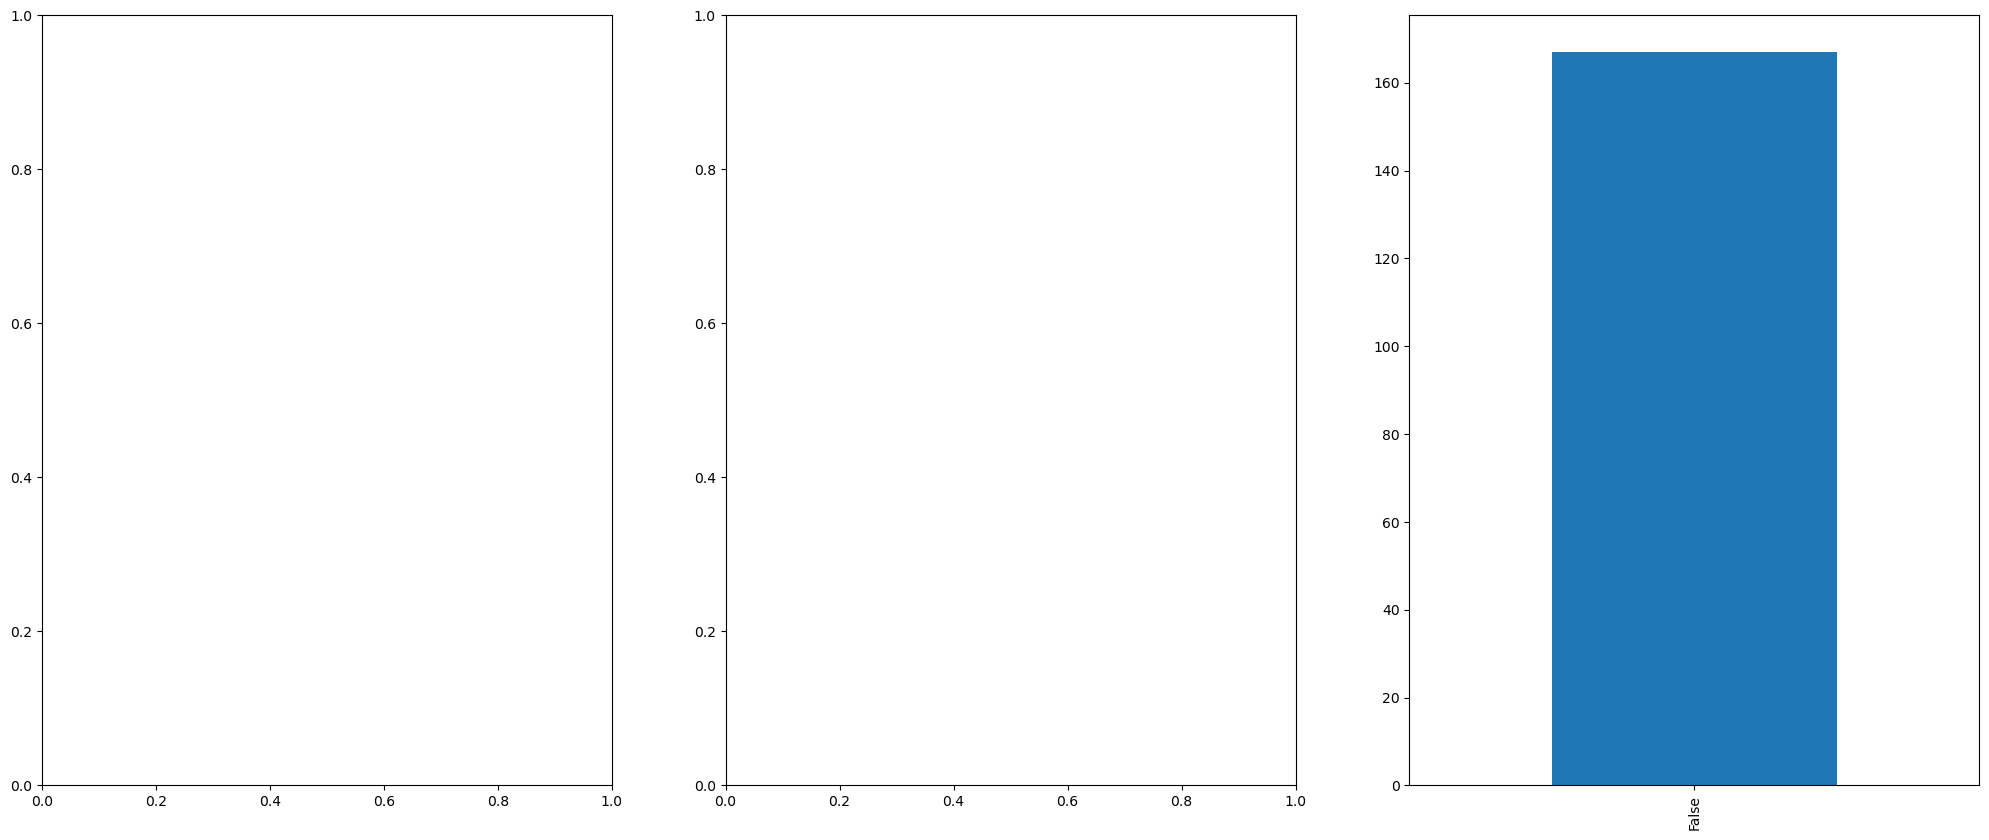

In [94]:
fig, ax = plt.subplots(nrows = 1, ncols = 3)

ax[0] = df_gpt_35[df_gpt_35['qtype'] == 't/f']['acc'].value_counts().plot(kind = 'bar')

ax[1] = df_gpt_35[df_gpt_35['qtype'] == 'mc']['acc'].value_counts().plot(kind = 'bar')

ax[2] = df_gpt_35[df_gpt_35['qtype'] == 'num']['acc'].value_counts().plot(kind = 'bar')

fig.set_figheight(10)

fig.set_figwidth(25)

In [91]:
dir(fig)

['_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_axes_internal',
 '_agg_filter',
 '_align_label_groups',
 '_alpha',
 '_animated',
 '_axobservers',
 '_axstack',
 '_button_pick_id',
 '_callbacks',
 '_canvas_callbacks',
 '_check_layout_engines_compat',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_default_contains',
 '_dpi',
 '_fig_callbacks',
 '_fully_clipped_to_axes',
 '_gci',
 '_get_dpi',
 '_get_draw_artists',
 '_get_renderer',
 '_gid',
 '_in_layout',
 '_internal_update',
 '_label',
 '_layout_engine',
 '_localaxes',
 '_mouse_key_ids',
 '_mouseover',
 '_norm_per_subplot_kw',
 '_normalize_grid_string',
 

<Axes: >

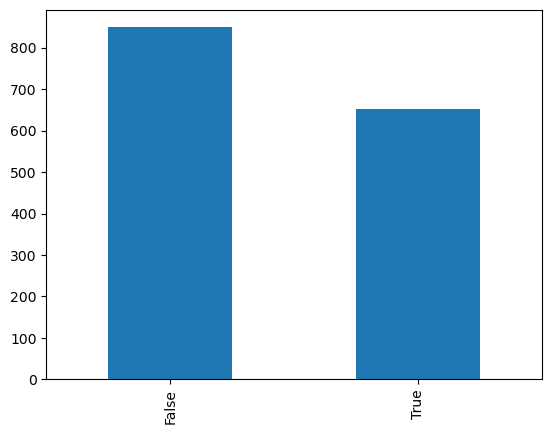

In [85]:
df_davinci[df_davinci['qtype'] == 't/f']['acc'].value_counts().plot(kind = 'bar')